In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\zone\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
%matplotlib inline

In [25]:
def plot_summary(dist, names='dist_name'):
    ser = pd.Series(dist)
    fig = plt.figure(1, figsize=(9,6))
    ax = fig.gca() # gca() 는 현재 axes를 반환한다.
    ser.hist(ax=ax, bins=120)
    ax.set_title('Frequency distribution of ' + names)
    ax.set_ylabel('Frequency')
    plt.show()
    return (ser.describe())

In [8]:
def sim_normal(nums, mean=600, sd=30):
    '''
    normal distribution 생성
    '''
    for n in nums:
        dist = np.random.normal(loc=mean, scale=sd, size=n)
        title = 'Normal distribution with ' + str(n) + 'values'
        print(plot_summary(dist,title))
        print(np.percentile(dist,[2.5,97.5]))
        print(' ')
    return 'done!'

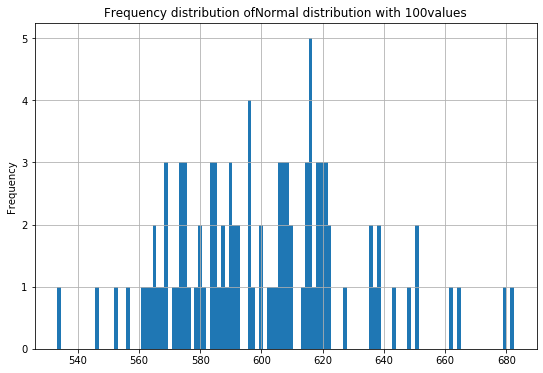

count    100.000000
mean     600.710154
std       28.343235
min      533.306884
25%      579.653850
50%      600.447616
75%      617.809827
max      682.510595
dtype: float64
[554.46164004 663.30224538]
 


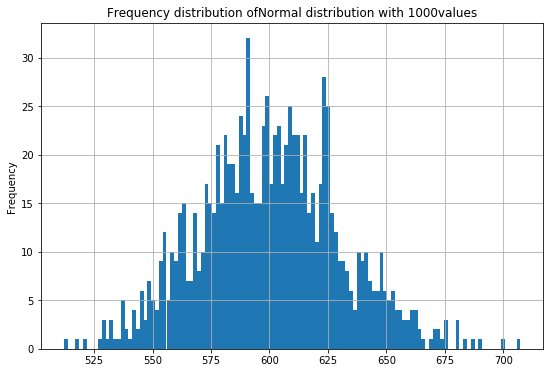

count    1000.000000
mean      600.246448
std        30.263775
min       511.973675
25%       580.012861
50%       599.835761
75%       620.819680
max       707.341025
dtype: float64
[543.77596369 661.3867476 ]
 


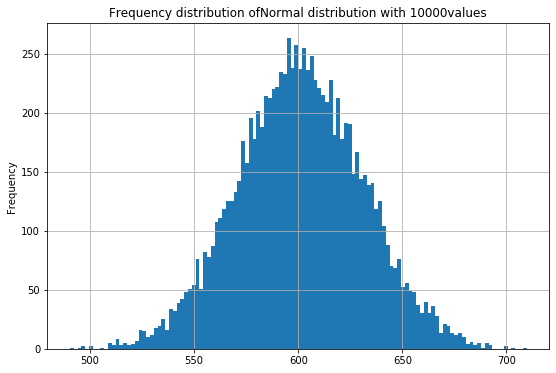

count    10000.000000
mean       600.963581
std         30.101434
min        490.380636
25%        580.710893
50%        600.847695
75%        621.406036
max        709.658039
dtype: float64
[542.18933134 661.04813177]
 


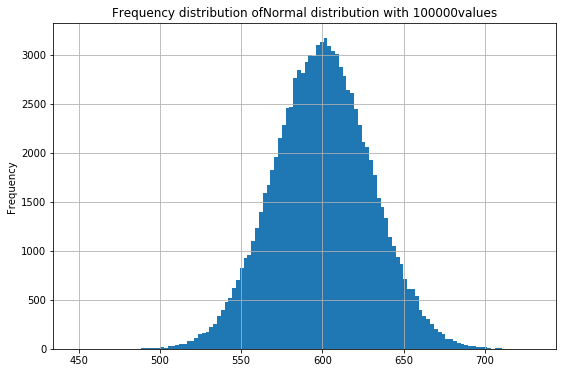

count    100000.000000
mean        599.985915
std          30.010879
min         448.613669
25%         579.728258
50%         599.998410
75%         620.196993
max         729.433405
dtype: float64
[541.25530434 658.74323879]
 


'done!'

In [9]:
nums = [100,1000,10000,100000]
sim_normal(nums)

In [10]:
def sim_poisson(nums, mean=600):
    '''
    푸아송 분포 생성
    '''
    for n in nums:
        dist = np.random.poisson(lam = mean, size=n)
        title = 'Poisson distribution with ' + str(n) + 'values'
        print(plot_summary(dist,title))
        print(np.percentile(dist, [2.5, 97.5]))
        print(' ')
    print('done!')

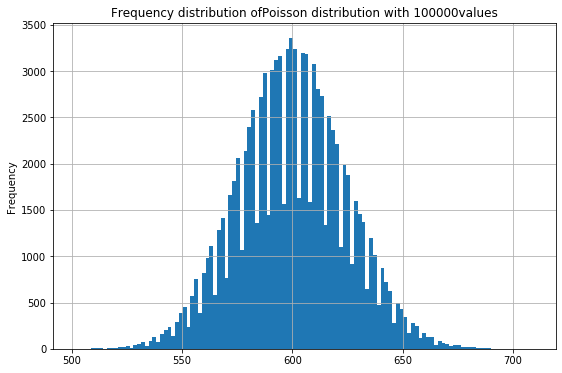

count    100000.000000
mean        600.042030
std          24.495322
min         502.000000
25%         583.000000
50%         600.000000
75%         616.000000
max         709.000000
dtype: float64
[553. 648.]
 
done!


In [12]:
sim_poisson([100000])

* 평균600명의 손님 std 30인 경우 profit을 예측해보자
* profit = customers * (profit + tips)로 계산


In [15]:
def gen_profits(num):
    '''
    profit을 uniform distribution으로 생성
    '''
    unif = np.random.uniform(size=num)
    out = [5 if x<0.3 else (3.5 if x<0.6 else 4) for x in unif]
    return out

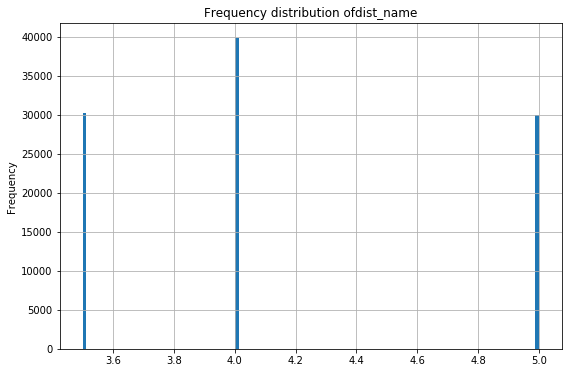

count    100000.000000
mean          4.148180
std           0.594173
min           3.500000
25%           3.500000
50%           4.000000
75%           5.000000
max           5.000000
dtype: float64

In [14]:
prfts = gen_profits(100000)
plot_summary(prfts)

In [16]:
def gen_tips(num):
    unif = np.random.uniform(size=num)
    out = [0 if x<0.5 else (0.25 if x<0.7 else (1.0 if x<0.5 else 2.0)) for x in unif]
    return out

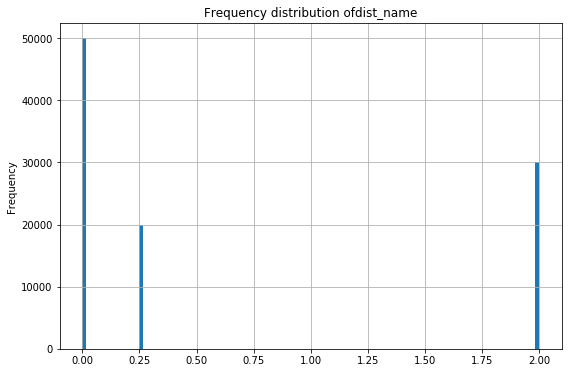

count    100000.000000
mean          0.650890
std           0.889282
min           0.000000
25%           0.000000
50%           0.250000
75%           2.000000
max           2.000000
dtype: float64

In [17]:
tps = gen_tips(100000)
plot_summary(tps)

In [23]:
def sim_lemonade(num, mean=600, sd=30, pois=False):
    
    # 손님이 정규분포 혹은 푸아송 분포일때
    if pois:
        arrivals = np.random.poisson(lam=mean, size=num)
    else:
        arrivals = np.random.normal(loc=mean, scale=sd, size=num)
    print(plot_summary(arrivals, 'customer arrivals per day'))
    
    # 손님에 따른 profit 분포 파악
    profit = gen_profits(num)
    print(plot_summary(profit, 'profit per arrival'))
    
    # 총 profit per arrival
    total_profit = arrivals * profit
    print(plot_summary(total_profit, 'total profit per day'))
    
    # tips 분포 파악
    tips = gen_tips(num)
    print(plot_summary(tips, 'tips per arrival'))
    
    # 총 tips per arrival
    total_tips = arrivals * tips
    print(plot_summary(total_tips, 'total tips per arrival'))
    
    # 총 profit
    total_take = total_profit + total_tips
    print(plot_summary(total_take, 'total take per day'))

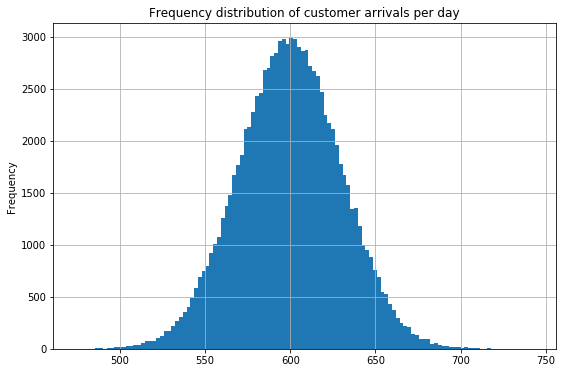

count    100000.000000
mean        599.741666
std          29.998467
min         474.511158
25%         579.558275
50%         599.797784
75%         619.856175
max         742.277986
dtype: float64


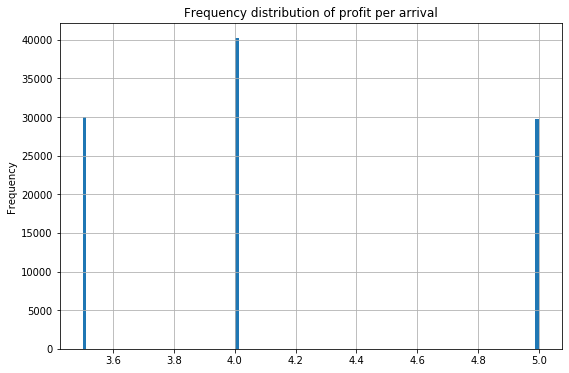

count    100000.000000
mean          4.147420
std           0.592445
min           3.500000
25%           3.500000
50%           4.000000
75%           5.000000
max           5.000000
dtype: float64


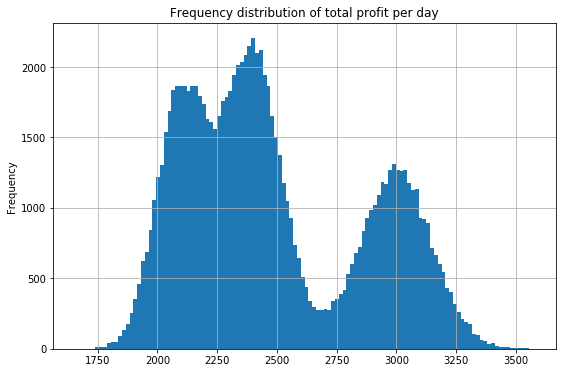

count    100000.000000
mean       2487.333978
std         376.522257
min        1660.789052
25%        2182.545304
50%        2398.813844
75%        2849.866318
max        3570.699732
dtype: float64


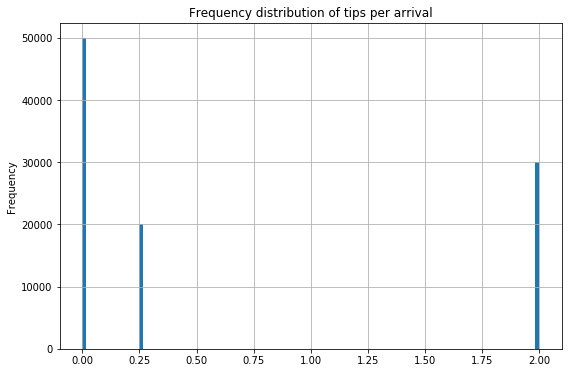

count    100000.000000
mean          0.650265
std           0.888785
min           0.000000
25%           0.000000
50%           0.250000
75%           2.000000
max           2.000000
dtype: float64


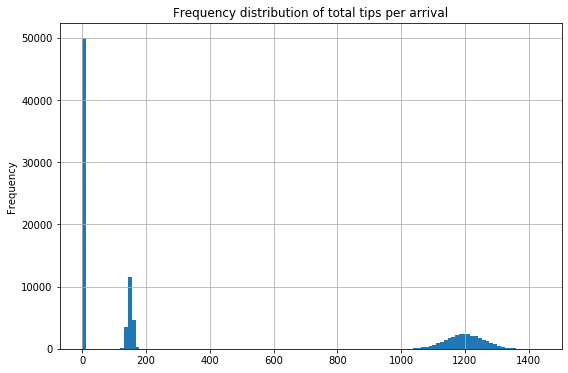

count    100000.000000
mean        390.103825
std         534.222886
min           0.000000
25%           0.000000
50%         128.800563
75%        1141.920675
max        1432.532294
dtype: float64


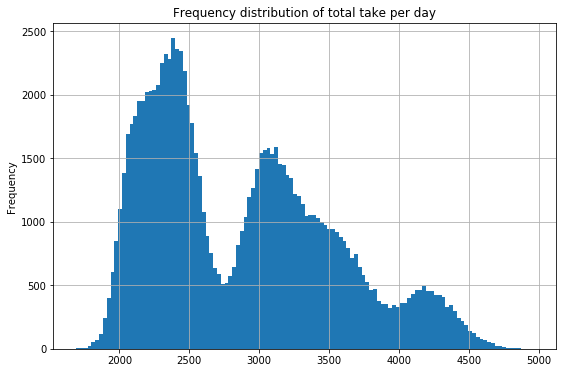

count    100000.000000
mean       2877.437802
std         656.886037
min        1691.675194
25%        2324.045839
50%        2782.009651
75%        3329.685547
max        4958.584203
dtype: float64


In [26]:
sim_lemonade(100000)